# Poisonous Mushrooms



In [1]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [2]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [3]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [4]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


### Question 1:PCA and fraction of total variance
---

1. Do a principal components analysis on the data.
1. Print what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].
1. Show a lineplot of fraction of total variance vs. number of principal components, for all possible numbers of principal components.
1. You only need to call PCA.fit once.

Notes:
* The pandas DataFrame [cumsum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumsum.html) function may be helpful.
* You can use `PCA` to produce a PCA analysis.

Fraction of Total Variance Explained by First 1 principal components: 0.16404331279334286
Fraction of Total Variance Explained by First 2 principal components: 0.13323478869447278
Fraction of Total Variance Explained by First 3 principal components: 0.10173456522146554
Fraction of Total Variance Explained by First 4 principal components: 0.07063356434985965
Fraction of Total Variance Explained by First 5 principal components: 0.03866646350702645
Fraction of Total Variance Explained by First 10 principal components: 0.022309425678452073
Fraction of Total Variance Explained by First 20 principal components: 0.011463789508517942
Fraction of Total Variance Explained by First 30 principal components: 0.007002759621903051
Fraction of Total Variance Explained by First 40 principal components: 0.004397877728588488
Fraction of Total Variance Explained by First 50 principal components: 0.002044511772301955


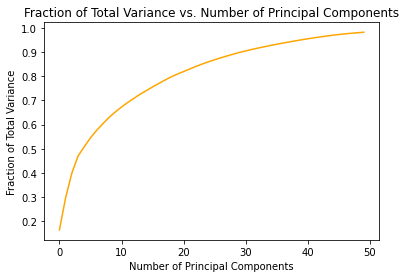

In [5]:
def P1():
    ## STUDENT START ###
    # For each of the k's in the given list
    for component in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]: 
        # Doing a principal component analysis
        pca = PCA(n_components = component)
        # Fitting the training data
        pca.fit(train_data)
        # Finding the fraction of the total variance in the training data explained by the first k principal components
        pca_cumsum = np.cumsum(pca.explained_variance_ratio_)

    # Showing a lineplot of fraction of total variance vs. number of principal components, for all possible numbers of principal components
    plt.plot(pca_cumsum, color = 'orange')
    plt.title('Fraction of Total Variance vs. Number of Principal Components')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Fraction of Total Variance')
     
    # Printing out the results
    for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]:    
        print("Fraction of Total Variance Explained by First " + str(k) + " principal components: " 
              + str(pca.explained_variance_ratio_[k-1]))
    ## STUDENT END ###

P1()

### Question 2: PCA for visualization

PCA can be very useful for visualizing data. 
1. Project the training data down to 2 dimensions and show as a square scatterplot.
  - Show poisonous examples (labeled 1) in red and non-poisonous examples in green (labeled 0)
  - Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

Notes:
* You can use `PCA` to produce a PCA analysis.
* Be sure to add a title, axis labels and a legend to your graph.

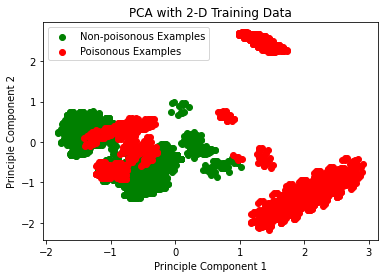

In [6]:
def Q2():   
  ### STUDENT START ###
    # Projecting the training data down to 2 dimensions and transforming the training data
    train_data_transformed = PCA(n_components = 2).fit_transform(train_data)

    plot = plt.subplot(1, 1, 1)
    # Plotting the poisonous examples (labeled 1) in red and non-poisonous examples in green (labeled 0)
    plot.scatter(train_data_transformed[train_labels == 0, 0], train_data_transformed[train_labels == 0, 1], 
                 color='green', label='Non-poisonous Examples')
    plot.scatter(train_data_transformed[train_labels == 1, 0], train_data_transformed[train_labels == 1, 1], 
                 color='red', label='Poisonous Examples')
    # Adding a title, axis labels and a legend
    plt.title("PCA with 2-D Training Data")
    plt.xlabel("Principle Component 1")
    plt.ylabel("Principle Component 2")
    plt.legend()
  ### STUDENT END ###

Q2()

### Question 3: Visualizing GMMs
---

1. Fit a k-means cluster model with 6 clusters over the 2d projected data. 
  - As in part 2, show as a square scatterplot with the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  
  - For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

Notes:
* You can use `KMeans` to produce a k-means cluster analysis.
* You can use `linalg.norm` to determine distance (dissimilarity) between observations.

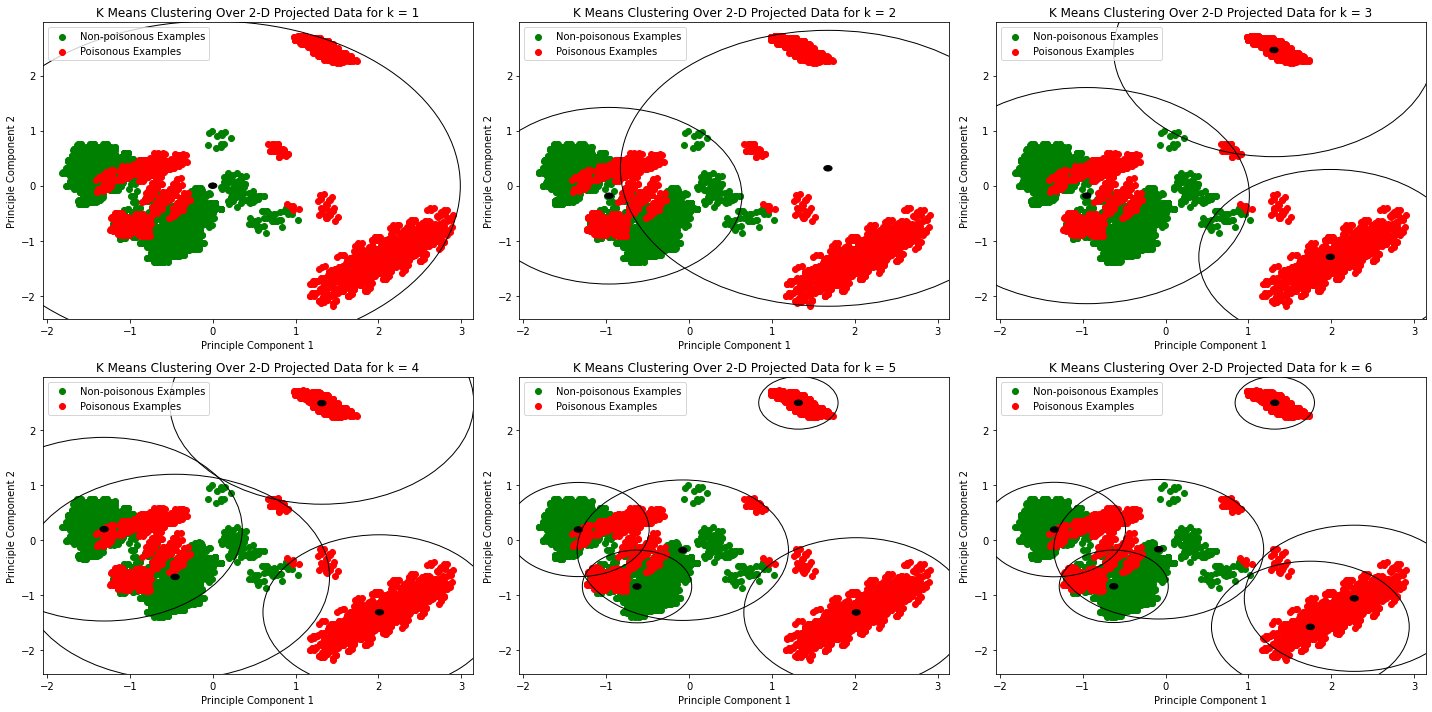

In [7]:
def Q3():   
  ### STUDENT START ##
    # Projecting the training data down to 2 dimensions and transform the training data
    train_data_transformed = PCA(n_components = 2).fit_transform(train_data)
    # Changing the figure size to display without overlap
    plt.figure(figsize=(20, 10))
    # Iterating through of the 6 clusters
    for cluster in range(6):
        # Adding each cluster's corresponding graph as a subplot
        plot = plt.subplot(2, 3, cluster + 1)
        # Initializing the Kmeans model with the cluster as k 
        model = KMeans(n_clusters = cluster + 1)
        # Fitting on the transformed training data
        clusters = model.fit(train_data_transformed)
        centers = []
        #  Finding the distances to each point using .transform 
        distances = model.transform(train_data_transformed)
        # Iterating through each point to find its relation to the center to locate the center of each cluster and add to the list of centers created above
        for point in range(cluster + 1):
            center_start = clusters.cluster_centers_[point,0]
            center_end = clusters.cluster_centers_[point,1]
            center = (center_start, center_end)
            centers += [center]
            # Plotting a circle that goes through the cluster's example that is most distant from the centroid
            circumference = np.max(distances[clusters.labels_ == point, point])
            plot.add_artist(plt.Circle(centers[point], circumference, fill=False))
            # Marking the centroid as a black point for each cluster
            plot.add_artist(plt.Circle(centers[point], 0.05, color = 'black'))
        
        # Plotting a scatterplot with the positive (poisonous) examples in red and the negative (non-poisonous) examples in green
        plot.scatter(train_data_transformed[train_labels == 0, 0], train_data_transformed[train_labels == 0, 1], 
                     color='green', label='Non-poisonous Examples')
        plot.scatter(train_data_transformed[train_labels == 1, 0], train_data_transformed[train_labels == 1, 1], 
                     color='red', label='Poisonous Examples')
        # Adding a title, x and y labels, and a legend
        plt.title('K Means Clustering Over 2-D Projected Data for k = ' + str(cluster + 1)) 
        plt.xlabel("Principle Component 1")
        plt.ylabel("Principle Component 2")
        plt.legend()
        plt.tight_layout()

  ### STUDENT END ###
Q3()

### Question 4: Understanding GMMs with Density Plots
---

1. Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data. 
  - Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  
  - Show a 4x4 grid of square-shaped plots of the estimated density contours. 
    - Each row showing a different number of mixture components. 
    - Each column showing a different convariance matrix type.  
1. Be sure to add a title for each plot in the grid to indicate what parameters were used.
1. How are the covariance types 'tied' and 'full' different? How do you see it in the plots?

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `contour` in combination with other methods to plot contours, like in this example: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
* You can use `contour` without the `norm` and `levels` parameters. 

/tmp/ipykernel_88/471057774.py:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')
/tmp/ipykernel_88/471057774.py:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')
/tmp/ipykernel_88/471057774.py:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')
/tmp/ipykernel_88/471057774.py:33: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it i

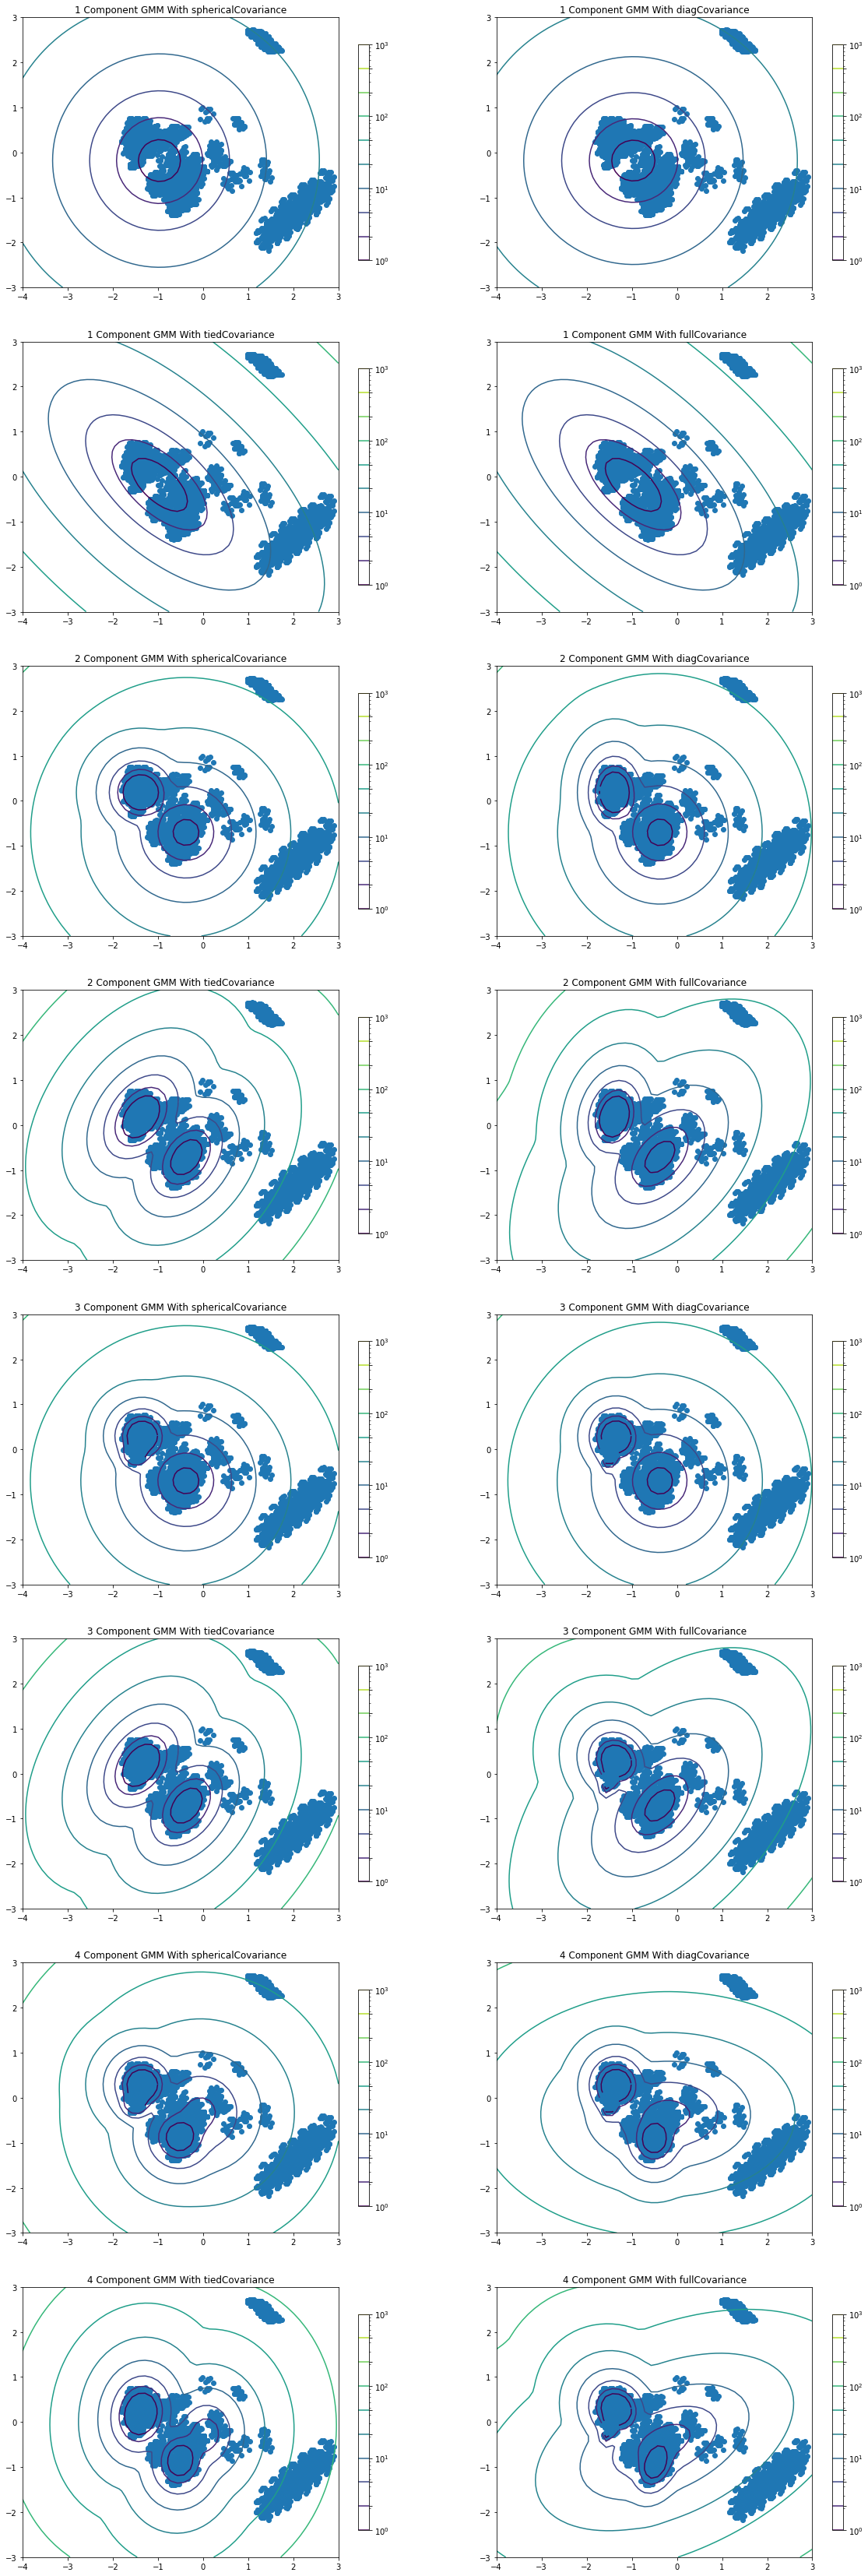

In [8]:
def Q4():
    ### STUDENT START ###
    # Projecting the training data down to 2 dimensions and transform the training data
    train_data_transformed = PCA(n_components = 2).fit_transform(train_data)
    # Changing the figure size to display without overlap
    plt.figure(figsize=(20, 60))
    # Setting the number of mixture components from 1 to 4
    components = np.arange(1, 5)
    # Setting the covariance matrix type 'spherical', 'diag', 'tied', 'full'
    covariance = ["spherical","diag","tied","full"]

    # Iterating through a 4x4 grid 
    for i in range(4):
        for j in range(4):
            # Setting up the square-shaped plots of the estimated density contours
            ax = plt.subplot(8, 2, ((4 * i) + j + 1))

            # Initializing a Gaussian Mixture Model with each possible mixture component and covariance matrix type
            # Using GaussianMixture(n_components=..., covariance_type=..., random_state=12345) to produce a Gaussian mixture model
            model = GaussianMixture(n_components=components[i], covariance_type=covariance[j], random_state=12345)
            # Fitting the Gaussian Micture Model on the transformed positive (poisonous) examples from the training data
            model.fit(train_data_transformed[train_labels == 0])

            # Displaying contour plots such that each row showing a different number of mixture components and each column showing a different convariance matrix type.
            # Setting up the XY grid 
            X, Y = np.meshgrid(np.linspace(-4, 3), np.linspace(-3, 3))
            # Setting up the Z with a transformation and reshaping it with X
            Z = - model.score_samples(np.array([X.ravel(), Y.ravel()]).T).reshape(X.shape)

            # Code guidance referenced: https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
            # Plotting the contour plots and displaying them
            CS = ax.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))
            CB = plt.colorbar(CS, shrink=0.8, extend='both')
            ax.scatter(train_data_transformed[:, 0], train_data_transformed[:, 1])

            # Printing a title for each plot in the grid to indicate what parameters were used
            plt.title(str(components[i]) + " Component GMM With " + str(covariance[j]) + "Covariance")
    ### STUDENT END ###

Q4()

Answer: While the 'full' covariance type indicates that each component has its own general covariance matrix, the 'tied' covariance type indicates that all the components share the same covariance matrix. As visually depicted in the plots, with 'full' covariance, the components are able independently adopt any position and/or shape, but with 'tied' covariance, the components have the same shape regardless of what it is.

### Question 5: Using Unsupervised models for classification...?
---

1. Fit two Gaussian mixture models:
  - On your 2d projected training data. 
    - Form a subset of all the poisonous examples and fit one GMM (gmm_poison).
    - Form a subset of all the non-poisonous examples and fit another GMM (gmm_nonpoison).
  - Use 4 mixture components and full convariance for each model.  
1. Use the above trained GMMs to classify examples in your test set:
   - For each example in the test set
     - Measure how likely it is to have been "generated" by gmm_poison and gmm_nonpoison (using score_samples).
     - Predict the more likely label.
  - You can use score_samples.
  - You can do this without a for loop which will be more efficient.
1. What is the accuracy of the predictions on the test data? (we expect it to be about 0.95)

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `GaussianMixture`'s `score_samples` method to find the probabilities.

In [9]:
def Q5():  
  ### STUDENT START ###
    # Transforming to 2d projected training data for training and test sets
    model = PCA(n_components=2)
    # Transforming the training data and test data 
    train_data_transformed = model.fit_transform(train_data)
    test_data_transformed = model.transform(test_data)

    # Getting the poisonous and nonpoisonous samples from the transformed training data
    train_data_poisonous = train_data_transformed[train_labels == 1]
    train_data_nonpoisonous = train_data_transformed[train_labels == 0]

    # Using 4 mixture components and full convariance for each model
    # Using GaussianMixture(n_components=..., covariance_type=..., random_state=12345)
    # Forming a subset of all the poisonous examples and fitting a GMM (gmm_poisonous)
    gmm_poisonous = GaussianMixture(n_components=4, covariance_type="full", 
                                    random_state=12345).fit(train_data_poisonous)
    # Forming a subset of all the non-poisonous examples and fitting one GMM (gmm_nonpoisonous).
    gmm_nonpoisonous = GaussianMixture(n_components=4, covariance_type="full", 
                                       random_state=12345).fit(train_data_nonpoisonous)

    # Initially setting the number of correctly predicted ones as 0
    correct = 0
    
    # Measuring how likely it is to have been "generated" by gmm_poison and gmm_nonpoison (using score_samples)
    test_probs_poisonous = gmm_poisonous.score_samples(test_data_transformed)
    test_probs_nonpoisonous = gmm_nonpoisonous.score_samples(test_data_transformed)

    # Using a for loop to iterate through each example in the test set
    for item in range(len(test_labels)):
        # Getting the most likely prediction and incrementing the number of correctly predicted poisonous and nonpoisonous accordingly
        if test_labels[item] == 1:
            if (test_probs_poisonous[item] > test_probs_nonpoisonous[item]):
                  correct += 1
        elif test_labels[item] == 0:
            if (test_probs_poisonous[item] < test_probs_nonpoisonous[item]):
                  correct += 1
            
    # Printing the respective accuracy: 
    print('Total Accuracy: ' + str((correct / len(test_labels)) * 100) + "%")
  ### STUDENT END ###

Q5()

Total Accuracy: 95.01779359430606%


Answer: The accuracy of the predictions on the test data is about 95.02%, which is about 95% as expected.

### Question 6: Understanding the GMM parameters
---

1. Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.
1. Print the best configuration and accuracy.
1. Plot a scatter plot of accuracy vs #params.
1. Bonus: Provide a better visualization by showing all four: accuracy, number of parameters, the covariance type and the number of PCA dimensions.



Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* [This spreadsheet](https://docs.google.com/spreadsheets/d/1LTEOU7q_Tgs4bX_3o2ePjDQrTRToZoc1J5XLlaRbmI0/edit?usp=sharing) should help (accessible from your google @berkeley.edu account)

* Spherical - Each GMM component has a mean per dimension, and one variance. 
* Diag - Each GMM component has a mean per dimension and a variance for each dimension.
* full - Each GMM component has a mean per dimension and a "full" covariance matrix. Only the covariance matrix is symmetric, so its $[i,j]$ entry would equal to its $[j,i]$ entry.
* tied - Finally, tied has all components share a single covariance matrix. So each GMM component has a mean per dimension but they all share the same 'full' covariance matrix.

Optimal Number of PCA Components: 7
Optimum number of GMM Components: 3
Optimal Covariance Type: spherical
Optimal Accuracy: 97.33096085409252%


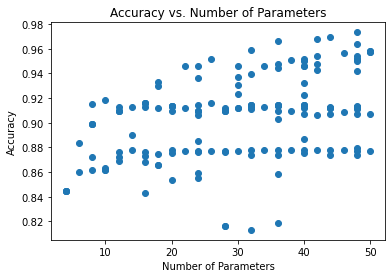

In [11]:
from matplotlib.lines import Line2D

def Q6():
  ### STUDENT START ###
    # Setting the best pca and gmm components, and accuracy to 0 and covar type to an empty string initially
    optimal_pca_components = 0
    optimal_gmm_components = 0
    optimal_covariance_type = ''
    optimal_accuracy = 0

    # Setting the parameter count to 0, list of parameters for the scatterplot to an empty list, and list of accuracies for the scatterplot to an empty list as well
    parameter_count = 0
    accuracies = []
    parameters = []
    
    # Iterating through all 24 possible pca components and gmm components as well as 4 possible covariance types via a triple for loop
    for pca_component in range(1, 25): 
        for gmm_component in range(1, 25): 
            for covariance_type in ['spherical', 'diag', 'full', 'tied']:   
                # Based on the spread sheet, the parameter count depends on the chosen covariance type
                if covariance_type == 'spherical':
                    parameter_count = (pca_component * gmm_component + gmm_component) * 2
                elif covariance_type == 'diag':
                    parameter_count = (pca_component * gmm_component + pca_component * gmm_component) * 2
                elif covariance_type == 'tied':
                    parameter_count = (pca_component * gmm_component + pca_component * (pca_component + 1) / 2) * 2
                elif covariance_type == 'full':
                    parameter_count = (pca_component * gmm_component + pca_component * (pca_component + 1) / 2 * gmm_component) * 2
                
                # Ensuring that there are no more than 50 parameters
                if parameter_count > 50:
                    continue
                    
                # Adding the parameter count for that instance into the list of all parameter numbers
                parameters.append(parameter_count)
                   
                # Initializing the PCA model
                model = PCA(n_components= pca_component)
                
                # Transforming the training data and test data 
                train_data_transformed = model.fit_transform(train_data)
                test_data_transformed = model.transform(test_data)

                # If the 
                gmm_poisonous = GaussianMixture(n_components = gmm_component, covariance_type = covariance_type, random_state=12345)
                gmm_nonpoisonous = GaussianMixture(n_components = gmm_component, covariance_type = covariance_type, random_state=12345)

                # Getting the poisonous and nonpoisonous samples from the transformed training data
                train_poisonous = train_data_transformed[train_labels == 1]
                train_nonpoisonous = train_data_transformed[train_labels == 0]
                
                # Using GaussianMixture(n_components=..., covariance_type=..., random_state=12345)
                # Forming a subset of all the poisonous examples and fitting a GMM (gmm_poison)
                gmm_poisonous.fit(train_poisonous)
                # Forming a subset of all the non-poisonous examples and fitting one GMM (gmm_nonpoisonous)
                gmm_nonpoisonous.fit(train_nonpoisonous)

                # Creating a counter for all the correctly predicted ones
                correct = 0
                
                # Measuring how likely it is to have been "generated" by gmm_poisonous and gmm_nonpoisonous (using score_samples)
                test_probs_poisonous = gmm_poisonous.score_samples(test_data_transformed)
                test_probs_nonpoisonous = gmm_nonpoisonous.score_samples(test_data_transformed)

                # Using a for loop to iterate through each example in the test set
                for item in range(len(test_labels)):
                    # Getting the most likely prediction and incrementing the number of correctly predicted poisonous and nonpoisonous accordingly
                    if test_labels[item] == 1:
                        if (test_probs_poisonous[item] > test_probs_nonpoisonous[item]):
                              correct += 1
                    elif test_labels[item] == 0:
                        if (test_probs_poisonous[item] < test_probs_nonpoisonous[item]):
                              correct += 1
                # Setting the accuracy to the number correct divided by the total number of test labels
                accuracy = correct / len(test_labels)
                
                # If the optimal accuracy is less than the accuracy here, then setting the optimal accuracy to this new accuracy
                # Also setting the optimal pca and gmm components as well as covariance type based on this instance
                if optimal_accuracy < accuracy:
                    optimal_accuracy = accuracy
                    optimal_pca_components = pca_component
                    optimal_gmm_components = gmm_component
                    optimal_covariance_type = covariance_type
                
                # Adding the accuracy to the list of all accuracies for the sake of the scatterplot
                accuracies.append(accuracy)

    # Printing out the optimum results
    print("Optimal Number of PCA Components: " + str(optimal_pca_components))
    print("Optimum number of GMM Components: " + str(optimal_gmm_components))
    print("Optimal Covariance Type: " + str(optimal_covariance_type))
    print("Optimal Accuracy: " + str(optimal_accuracy*100) + "%")
    
    # Plotting a scatter plot of accuracy vs # of params
    plt.scatter(x=parameters, y=accuracies)
    plt.title('Accuracy vs. Number of Parameters')
    plt.xlabel('Number of Parameters')
    plt.ylabel('Accuracy')
    plt.show()
    
  ### STUDENT END ###

Q6()